# **Khám phá dữ liệu**

Để khám phá xem cấu trúc dữ liệu, và hiểu dữ liệu

### **Import thư viện và load dữ liệu vào**

In [3]:
from src.data_processing import *
from src.config import *

#### **Quan sát dữ liệu trong file `vaccination_tweets.csv` ta để ý rằng, trong trường `user_description`, `user_location`, `text`, `hashtags`, các dữ liệu đều được phân cách bởi dấu `,` (không thể phân tách bằng hàm `np.genfromtxt()`), nên tôi có phương án xử lý như sau:**
- Bỏ các ký tự xuống dòng và thay bằng ký hiệu `\n`
- Vì các trường ở trên, dữ liệu được bao quanh bởi dấu `"`, nên tôi sẽ tìm dữ liệu trong dấu `"` và đổi tất cả dấu `,` thành dấu `;`
- Lưu vào file mới và xử lý trên file đó

In [4]:
clean_rows = []
current = ""
inside_quote = False

with open(FILE_PATH_VACCINENATION_TWEETS, "r", encoding="utf-8") as f:
    for line in f:
        # Bỏ ký tự xuống dòng ở cuối
        l = line.rstrip("\n")

        # Đếm số dấu " trong dòng
        quote_count = l.count('"')

        # Nếu chưa ở trong quote, thêm dòng mới
        if not inside_quote:
            current = l
        else:
            current += "\\n" + l   # nối dòng tweet bị xuống dòng

        # Cập nhật trạng thái quote
        if quote_count % 2 == 1:   # số lẻ → bật/tắt quote
            inside_quote = not inside_quote

        # Nếu đã đóng quote → dòng hoàn chỉnh
        if not inside_quote:
            clean_rows.append(current)


final_rows = []
for row in clean_rows:
    row2 = re.sub(r'"[^"]*"', replace_commas, row)
    final_rows.append(row2)


with open(FILE_PATH_CLEANED_VACCINENATION_TWEETS, "w", encoding="utf-8") as f:
    for r in final_rows:
        f.write(r + "\n")


In [5]:
data = np.genfromtxt(
    FILE_PATH_CLEANED_VACCINENATION_TWEETS, 
    delimiter=',',
    dtype=None,
    names=True,
    encoding='utf-8',
    comments=None,
    converters={
        3: lambda x: x.decode('utf-8') if isinstance(x, bytes) else str(x),  # user_description
        10: lambda x: x.decode('utf-8') if isinstance(x, bytes) else str(x), # text
        11: lambda x: x.decode('utf-8') if isinstance(x, bytes) else str(x)  # hashtags
    },
    missing_values='',
    filling_values= None

)


print("\n5 dòng đầu tiên:")
print("Header: ", data.dtype.names)
for i in range(min(10, len(data))):
    print(f"Row {i}: {data[i]}")




5 dòng đầu tiên:
Header:  ('id', 'user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet')
Row 0: (1340539111971516416, 'Rachel Roh', '"La Crescenta-Montrose; CA"', '"Aggregator of Asian American news; scanning diverse sources 24/7/365. RT\'s; Follows and \'Likes\' will fuel me 👩\u200d💻"', '2009-04-08 17:52:46', 405, 1692, 3247, False, '2020-12-20 06:06:44', 'Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF', "['PfizerBioNTech']", 'Twitter for Android', 0, 0, False)
Row 1: (1338158543359250433, 'Albert Fong', '"San Francisco; CA"', '"Marketing dude; tech geek; heavy metal & \'80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own."', '2009-09-21 15:27:30', 834, 666, 178, False, '2020-12-13 16:27:13', '"While the world has been on the wrong side of

#### **Ta sẽ gán `data` cho `raw_data`, rồi sử dụng trên `raw_data` để tránh thay đổi dữ liệu gốc**

In [6]:
raw_data = data.copy()
print(raw_data)

[(1340539111971516416, 'Rachel Roh', '"La Crescenta-Montrose; CA"', '"Aggregator of Asian American news; scanning diverse sources 24/7/365. RT\'s; Follows and \'Likes\' will fuel me 👩\u200d💻"', '2009-04-08 17:52:46',    405, 1692, 3247, False, '2020-12-20 06:06:44', 'Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF', "['PfizerBioNTech']", 'Twitter for Android', 0, 0, False)
 (1338158543359250433, 'Albert Fong', '"San Francisco; CA"', '"Marketing dude; tech geek; heavy metal & \'80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own."', '2009-09-21 15:27:30',    834,  666,  178, False, '2020-12-13 16:27:13', '"While the world has been on the wrong side of history this year; hopefully; the biggest vaccination effort we\'ve ev… https://t.co/dlCHrZjkhm"', '', 'Twitter Web App', 1, 1, False)
 (1337858199140118533, 'eli🇱🇹🇪🇺👌', 'Your Bed', '"heil; hydra 🖐☺"', '2020-06-25 23:30:28',     10,   88,  155, False

---
### **Cùng nhau tìm hiểu dữ liệu thôi**

In [7]:
print("Số cột:", len(raw_data.dtype.names))
print("Số hàng: ", len(raw_data))

Số cột: 16
Số hàng:  11020


In [8]:
print("Tên các cột")
raw_data.dtype.names

Tên các cột


('id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet')

In [9]:
print("Các kiểu dữ liệu của các cột")
raw_data.dtype.descr

Các kiểu dữ liệu của các cột


[('id', '<i8'),
 ('user_name', '<U52'),
 ('user_location', '<U120'),
 ('user_description', '<U229'),
 ('user_created', '<U19'),
 ('user_followers', '<i8'),
 ('user_friends', '<i8'),
 ('user_favourites', '<i8'),
 ('user_verified', '|b1'),
 ('date', '<U19'),
 ('text', '<U156'),
 ('hashtags', '<U140'),
 ('source', '<U31'),
 ('retweets', '<i8'),
 ('favorites', '<i8'),
 ('is_retweet', '|b1')]

Ta thấy rằng ở cột `user_created`, `date` là kiểu str nên ta phải chuyển sang dạng ngày tháng, đồng thời cũng gán `new_data` cho dữ liệu bị thay đổi

In [10]:
user_created_str = raw_data['user_created']
date_str = raw_data['date']

# Chuyển đổi sang datetime
user_created_dt = user_created_str.astype('datetime64[s]')
date_dt = date_str.astype('datetime64[s]')


new_dtype = raw_data.dtype.descr  
new_dtype_list = list(new_dtype) 

for i, (name, dtype) in enumerate(new_dtype_list):
    if name == 'user_created' or name == 'date':
        new_dtype_list[i] = (name, 'datetime64[s]') 
        
new_data = np.empty(raw_data.shape, dtype=new_dtype_list)

# Sao chép các trường cũ và gán các trường mới
for name in raw_data.dtype.names:
    if name != 'user_created' and name != 'date':
        new_data[name] = raw_data[name]

new_data['user_created'] = user_created_dt
new_data['date'] = date_dt

print("Kiểu dữ liệu mới của cột 'user_created':", new_data['user_created'].dtype)
print("Kiểu dữ liệu mới của cột 'date':", new_data['date'].dtype)

Kiểu dữ liệu mới của cột 'user_created': datetime64[s]
Kiểu dữ liệu mới của cột 'date': datetime64[s]



### **Bây giờ ta sẽ quan sát xem có thiếu trường nào không?**

In [11]:
print(f"{'Cột':<30}{'Số Lượng Thiếu':>15}{'Tỉ Lệ Thiếu':>15}")
print("-" * 60)

total_rows = len(new_data)

for col_name in new_data.dtype.names:
    col_data = new_data[col_name]
    missing_count = 0
    
    # Kiểm tra kiểu dữ liệu của cột
    dtype_kind = col_data.dtype.kind
    
    if dtype_kind in 'fi': # f: float i: integer 
        # Đối với cột số, kiểm tra np.nan
        if dtype_kind == 'i':
            pass
        try:
            missing_count = np.sum(np.isnan(col_data))
        except TypeError:
            pass
             
    elif dtype_kind in 'SU': # S: string/bytes; U: unicode string
        # kiểm tra chuỗi rỗng ('')
        
        is_empty_string = (col_data == b'') # Kiểm tra cho bytes (S)
        is_empty_unicode = (col_data == '') # Kiểm tra cho Unicode (U)

        missing_count = np.sum(is_empty_string) + np.sum(is_empty_unicode)

    # In kết quả nếu có giá trị thiếu
    if missing_count > 0:
        missing_percentage = (missing_count / total_rows) * 100
        print(f"{col_name:<30}{missing_count:>15}{missing_percentage:>15.2f}%")

print("-" * 60)

Cột                            Số Lượng Thiếu    Tỉ Lệ Thiếu
------------------------------------------------------------
user_location                            2270          20.60%
user_description                          679           6.16%
hashtags                                 2582          23.43%
source                                      1           0.01%
------------------------------------------------------------


#### **Ta có những nhận định sau:**

**Hashtag bị miss 23.43%**: Gần một phần tư số lượng tweet không sử dụng hashtag. Điều này cho thấy đa số người dùng chỉ là chia sẻ cảm xúc, tin tức cá nhân.

**Note**: các trường bị thiếu là các trường liên quan tới dữ liệu text, các trường dữ liệu số thì đủ

### **Khám phá xem các trường số như `user_followers`, `user_friends`, `user_favourites`, `retweets`, `favorites`**

In [12]:
numerical_col = ['user_followers', 'user_friends', 'user_favourites', 'retweets', 'favorites']

print(f"{'Column Name':<20}{'Min':>12}{'Max':>12}{'Mean':>14}{'Median':>12}{'Q1':>12}{'Q3':>12}")
print("-" * 95)
for col in numerical_col:
    col_data = new_data[col]
    min_val = np.min(col_data)
    max_val = np.max(col_data)
    mean_val = np.mean(col_data)
    median_val = np.median(col_data)
    Q1 = np.quantile(col_data, 0.25)
    Q3 = np.quantile(col_data, 0.75)

    
   
    print(
        f"{col:<20}"
        f"{min_val:>12.0f}"  
        f"{max_val:>12.0f}"
        f"{mean_val:>14.2f}"
        f"{median_val:>12.2f}"
        f"{Q1:>12.2f}"
        f"{Q3:>12.2f}"

    )

Column Name                  Min         Max          Mean      Median          Q1          Q3
-----------------------------------------------------------------------------------------------
user_followers                 0    13714928      35188.27      479.00      111.00     2171.25
user_friends                   0      103226       1170.47      460.00      164.00     1221.00
user_favourites                0     1213794      15332.89     2323.50      436.00    11140.75
retweets                       0         678          1.36        0.00        0.00        1.00
favorites                      0        2315          7.51        1.00        0.00        4.00


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\2635759003.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, vert=False, labels=clean_cols, notch=True, patch_artist=True)


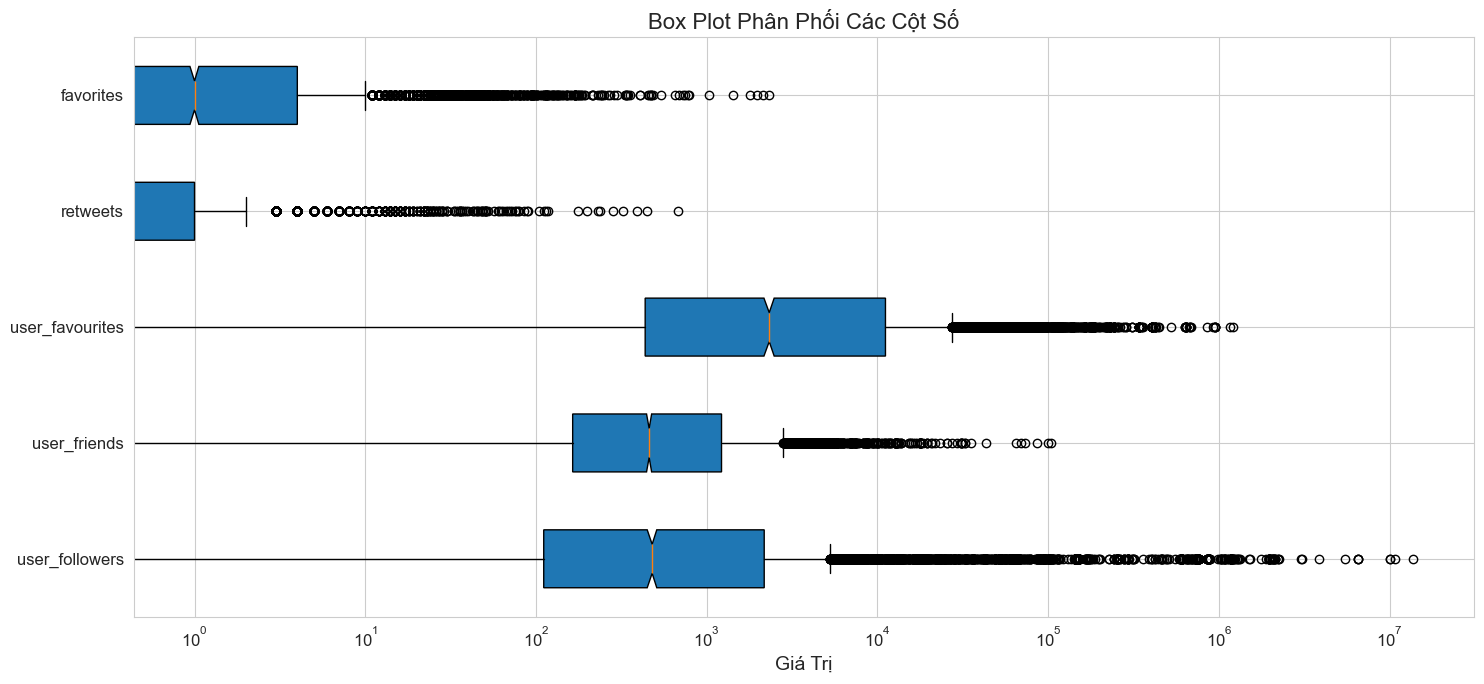

In [13]:
plot_data = []
clean_cols = []
for col in numerical_col:
    col_data = new_data[col]
    plot_data.append(col_data)
    clean_cols.append(col)

# vẽ boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(plot_data, vert=False, labels=clean_cols, notch=True, patch_artist=True)

plt.title('Box Plot Phân Phối Các Cột Số', fontsize=16)
plt.xlabel('Giá Trị', fontsize=14)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.set_xscale('log') 

plt.tight_layout()
plt.show()

#### **Ta có thể có những nhận định sau:**
- Dữ liệu ở tất cả các cột đều có sự **lệch dương mạnh**. Điều này là đặc trưng của dữ liệu mạng xã hội, nơi một số lượng rất nhỏ các tweet/tài khoản nhận được sự tương tác hoặc có ảnh hưởng cực lớn, kéo giá trị trung bình lên cao. Trung vị là chỉ số đáng tin cậy nhất.
- **`user_followers`**: hầu hết người dùng là *người bình thường*, hơn *50%* các tweet đến từ các tài khoản có dưới hơn *479 followers*
- **`user_friends`**: Hơn *50%* các tài khoản có *bạn bè ít hơn 460 người*, vậy nên đây là các tài khoản cá nhân
- **`user_favourites`**: có *median: 2.323*. Các tài khoản là người dùng hoạt động tương đối thường xuyên, nhưng có số ít tài khoản hoạt động rất sôi nổi *(max: 1,2tr)*
- **`retweets`**,**`favorites`**: Phần lớn tweet bị bỏ qua, nhưng một số ít tweet đã lan truyền mạnh mẽ và thu hút được sự chú ý lớn


### **Ta cùng quan sát hệ số tương quan giữa các trường số trên xem có quan hệ gì không**

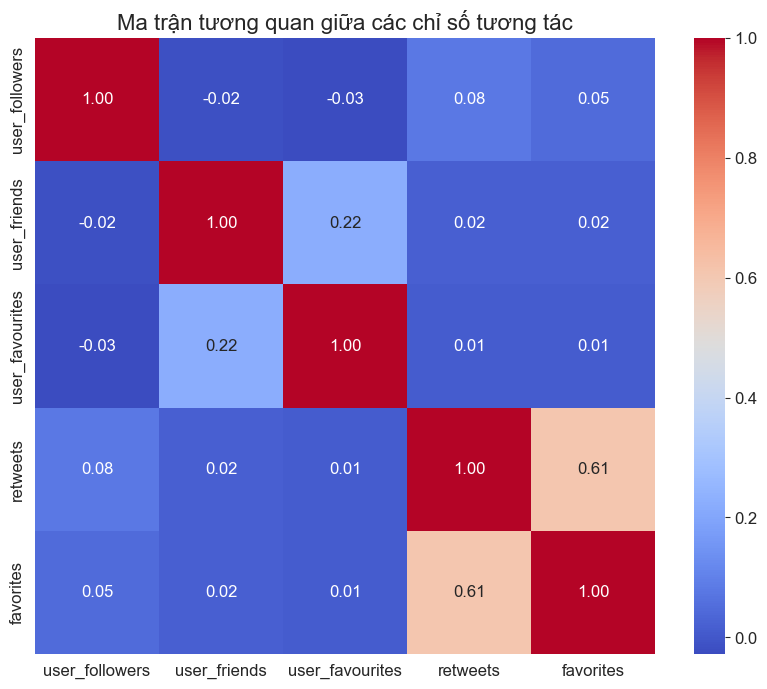

In [14]:
# Chọn các cột số quan trọng
num_cols = ['user_followers', 'user_friends', 'user_favourites', 'retweets', 'favorites']
data_matrix = np.column_stack([new_data[col] for col in num_cols])

# Tính ma trận tương quan (dùng numpy)
corr_matrix = np.corrcoef(data_matrix, rowvar=False)

# Vẽ Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=num_cols, yticklabels=num_cols)
plt.title('Ma trận tương quan giữa các chỉ số tương tác', fontsize=16)
plt.show()


#### **Nhận định ban đầu**
- Có hệ số tương quan khá giữa số lượng `retweets` (đăng lại) và số lượng `favourites` (số lượt thích của bài tweet đăng tải). Nghĩa là các bài tweet có nhiều lượt tương tác sẽ có xu hướng được lan rộng và chia sẻ (hiển nhiên)
- Cột `user_friends` (số người mà user theo dõi) và `user_favourites` (số bài tweet mà user đã tương tác) cũng có tương quan với nhau nhưng không rõ ràng. Ta cũng không thể kết luận là người mà theo dõi càng nhiều người, thì sẽ có xu hướng sôi nổi trong việc tương tác với các nội dung trên mạng xã hội 
- Một điều mà ta có thể quan sát kĩ là số lượng người theo dõi `user_followers` hầu như không có sự tương quan với các trường khác/ hoặc rất nhỏ (đặc biệt là trường `retweets` và `favourites`) -> điều này nói rằng một bài tweet nhận được nhiều sự tương tác sẽ liên quan tới nội dung của bài tweet, hay tính hot,... hơn là đến từ số người followers của user

### **Để khám phá thêm về tập dữ liệu này, ta hãy bổ dung các trường mới**

#### **1. Engagement** 

Ta có công thức sau: $$Engagement =  Retweets + Favorites$$ 

**Giải thích:** Nguyên nhân là do hai trường này có tương quan với nhau như đã phân tích ở trước. Hai chỉ số này thường sẽ tăng giảm cùng nhau, nên nó thể hiện sự quan tâm của công chúng đến bài viết


In [15]:
ret = new_data['retweets'].astype(np.float64)
fav = new_data['favorites'].astype(np.float64)

engagement= (ret + fav) 

if "engagement" not in new_data.dtype.names:
    # Thêm vào structured array
    new_data = rfn.append_fields(new_data, "engagement", engagement, usemask=False)
    print("Thêm cột 'engagement' thành công!")
else:
    print("Cột 'engagement' đã tồn tại.")


Thêm cột 'engagement' thành công!


In [16]:
followers = new_data['user_followers'].astype(np.float64)

# tránh chia cho 0, đặt là 1 (tương đối)
followers_safe = np.where(followers == 0, 1, followers)

engagement_rate = engagement / followers_safe

# Thêm vào structured array
new_data = rfn.append_fields(new_data, "engagement_rate", engagement_rate, usemask=False)

print("Thêm cột engagement_rate thành công!")


Thêm cột engagement_rate thành công!


#### **3. Reputation Ratio** 

Ta có công thức sau: $$Reputation Ratio =  Followers \div Friends$$    

**Giải thích:** Xác định xem user đó có tầm ảnh hưởng như thế nào trên nền tảng mạng xã hội. Được đánh giá khi càng nhiều người theo dõi và ít kết bạn thì cho rằng là người/ tổ chức có tầm ảnh hưởng.
- $R >> 1$": tài khoản có tầm ảnh hưởng lớn
- $R \approx  1$: Tài khoản bình thường, người dùng bình thường 
- $R << 1$: Tài khoản quan tâm theo dõi người khác nhưng ít được follow lại (có thể là bot, hoặc một người kì quặc :> )  



In [17]:
friends = new_data['user_friends'].astype(float)

# Cộng 1 vào friends để tránh chia cho 0
reputation_ratio = followers / (friends + 1)

# Thêm vào dữ liệu
if 'reputation_ratio' not in new_data.dtype.names:
    new_data = rfn.append_fields(new_data, "reputation_ratio", reputation_ratio, usemask=False)
    print("Đã thêm cột 'reputation_ratio' thành công!")
else:
    print("Cột 'reputation_ratio' đã tồn tại.")

print(f"Max Reputation: {np.max(reputation_ratio):.2f}")
print(f"Median Reputation: {np.median(reputation_ratio):.2f}")

Đã thêm cột 'reputation_ratio' thành công!
Max Reputation: 195927.54
Median Reputation: 0.81


#### **4. Account Class** 

**Giải thích:** Ta phân loại các tài khoản theo số lượng followers, từ đó ta có thể đánh giá xem mức độ hoạt động của từng loại tài khoản này như thế nào.


In [18]:
followers = new_data['user_followers'].astype(np.float64)

conditions = [
    followers <= 100,
    (followers > 100) & (followers <= 1000),
    (followers > 1000) & (followers <= 10000),
    followers > 10000
]

# Định nghĩa các nhãn tương ứng
choices = ['weak', 'norm', 'strong', 'influencer']

# Áp dụng np.select để tạo cột phân loại mới
# 'acc_class' sẽ chứa nhãn phân loại
acc_class = np.select(conditions, choices, default='unknown')

# Thêm trường mới 'acc_class' vào mảng new_data
if 'acc_class' not in new_data.dtype.names:
    new_data = rfn.append_fields(
        base=new_data, 
        names='acc_class', 
        data=acc_class, 
        dtypes='<U15', 
        usemask=False
    )
    print("Đã thêm cột 'acc_class' thành công!")
else:
    print("Cột 'acc_class' đã tồn tại.")



print(f"{'Followers':<12} {'Account Class':<15}")
print("-" * 27)

for i in range(10):
    print(f"{new_data['user_followers'][i]:<12} {new_data['acc_class'][i]:<15}")

Đã thêm cột 'acc_class' thành công!
Followers    Account Class  
---------------------------
405          norm           
834          norm           
10           weak           
49165        influencer     
152          norm           
105          norm           
2731         strong         
21924        influencer     
887          norm           
671          norm           


In [19]:
# Đếm số lượng user trong mỗi nhóm
unique_classes, counts = np.unique(new_data['acc_class'], return_counts=True)
for acc_class, count in zip(unique_classes, counts):
    percentage = (count / len(new_data)) * 100
    print(f"{acc_class:<12}: {count:>6} users ({percentage:.1f}%)")


influencer  :   1242 users (11.3%)
norm        :   4343 users (39.4%)
strong      :   2883 users (26.2%)
weak        :   2552 users (23.2%)


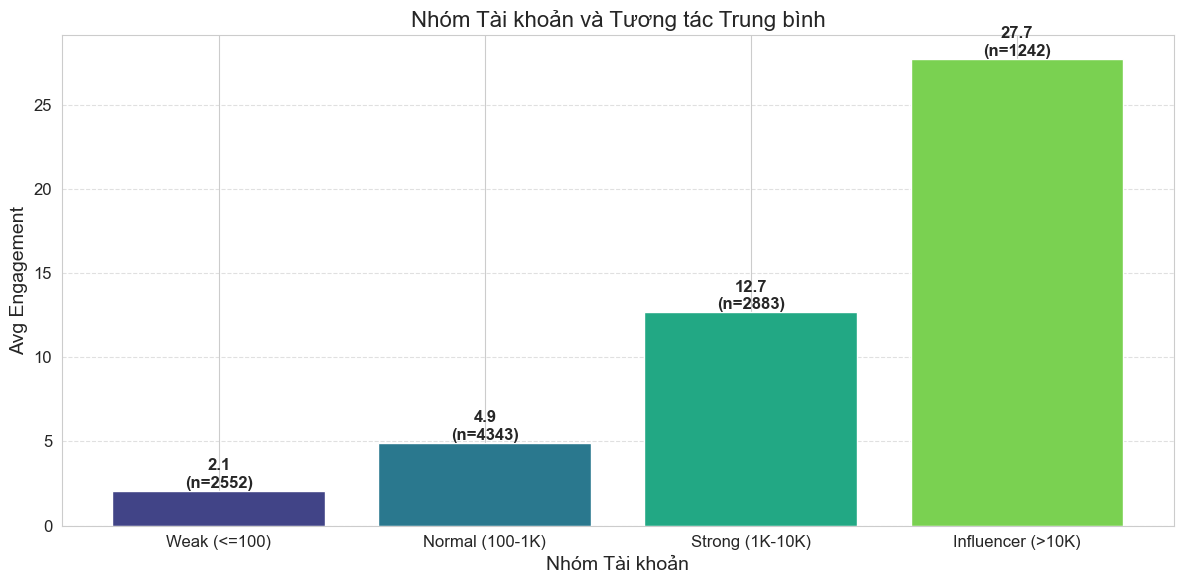

In [20]:

ordered_classes = ['weak', 'norm', 'strong', 'influencer']
class_labels_display = ['Weak (<=100)', 'Normal (100-1K)', 'Strong (1K-10K)', 'Influencer (>10K)']

# Tính Engagement trung bình cho mỗi nhóm
avg_eng_by_class = []
counts_by_class = []

for cls in ordered_classes:

    mask = new_data['acc_class'] == cls
    
    if np.sum(mask) > 0:
        avg_eng = np.mean(new_data['engagement'][mask])
        count = np.sum(mask)
    else:
        avg_eng = 0
        count = 0
        
    avg_eng_by_class.append(avg_eng)
    counts_by_class.append(count)

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))

bars = plt.bar(class_labels_display, avg_eng_by_class, color=sns.color_palette('viridis', 4))

plt.title('Nhóm Tài khoản và Tương tác Trung bình', fontsize=16)
plt.xlabel('Nhóm Tài khoản', fontsize=14)
plt.ylabel('Avg Engagement', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Hiển thị giá trị trên mỗi cột
for bar, val, count in zip(bars, avg_eng_by_class, counts_by_class):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'{val:.1f}\n(n={count})', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

---

### **Bây giờ ta sẽ đánh giá về thời gian tạo tweet cũng như là số tuổi của tài khoản**

In [21]:

date_col = new_data['date']

min_date = np.min(date_col)
max_date = np.max(date_col)

print(f"Ngày đăng tweet sớm nhất nhất: {min_date}")
print(f"Ngày đăng tweet muộn nhất: {max_date}")

data_range = (max_date - min_date).astype('timedelta64[D]')
print(f"Phạm vi thu thập: {data_range}")


Ngày đăng tweet sớm nhất nhất: 2020-12-12T11:55:28
Ngày đăng tweet muộn nhất: 2021-11-23T20:30:48
Phạm vi thu thập: 346 days


In [22]:
user_created_col = new_data['user_created']
min_created = np.min(user_created_col)
max_created = np.max(user_created_col)

print(f"Ngày tạo user account sớm nhất: {min_created}")
print(f"Ngày tạo user account muộn nhất: {max_created}")


Ngày tạo user account sớm nhất: 2006-07-15T21:06:00
Ngày tạo user account muộn nhất: 2021-11-18T22:02:07


In [23]:
# Tính toán Tuổi tài khoản
account_age = new_data['date'] - new_data['user_created']

# Cột mới phải được thêm bằng hàm chuyên biệt


if 'acc_age' not in new_data.dtype.names:
    new_data = rfn.append_fields(
        base=new_data, 
        names='acc_age', 
        data=account_age, 
        usemask=False
    )
    print("Đã thêm cột 'acc_age' thành công!")
else:
    print("Cột 'acc_age' đã tồn tại.")

print(f"Tuổi tài khoản Trung bình (Mean Age): {(np.mean(account_age)).astype('timedelta64[D]')}")
print(f"Tuổi tài khoản Trung vị (Median Age): {(np.median(account_age)).astype('timedelta64[D]')}")
print(f"Tuổi tài khoản Nhỏ nhất (Min Age): {np.min(account_age)}")
print(f"Tuổi tài khoản Lớn nhất (Max Age): {(np.max(account_age)).astype('timedelta64[D]')}")


Đã thêm cột 'acc_age' thành công!
Tuổi tài khoản Trung bình (Mean Age): 2532 days
Tuổi tài khoản Trung vị (Median Age): 2865 days
Tuổi tài khoản Nhỏ nhất (Min Age): 139 seconds
Tuổi tài khoản Lớn nhất (Max Age): 5417 days


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\590218480.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([age_in_seconds], vert=False, labels=['Account Age '],


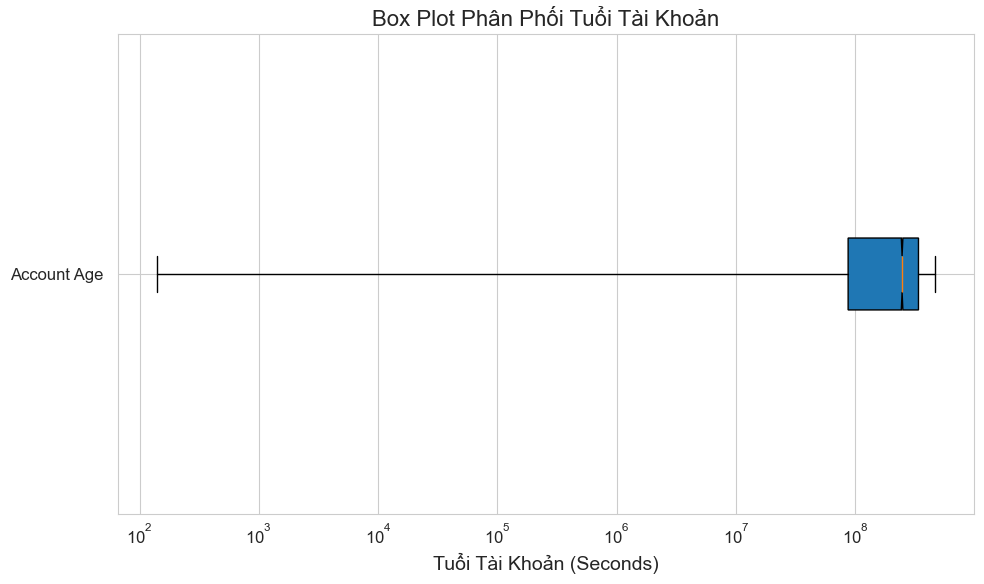

In [24]:
# Áp dụng .astype('timedelta64[s]') để đảm bảo tất cả đều là giây trước khi chuyển sang float
age_in_seconds = account_age.astype('timedelta64[s]').astype(float)

# Vẽ boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([age_in_seconds], vert=False, labels=['Account Age '], 
            notch=True, patch_artist=True)

plt.title('Box Plot Phân Phối Tuổi Tài Khoản', fontsize=16)
plt.xlabel('Tuổi Tài Khoản (Seconds)', fontsize=14)

# Thiết lập log scale cho trục X 
ax = plt.gca()
ax.set_xscale('log') 

plt.tight_layout()
plt.show()

#### **Ta có những nhận định sau:**
- Tuổi trung bình của tài khoản khá lâu (>10^8, vài năm)
- Ta có thể thấy là có nhiều tài khoản là có thể là bot: tài khoản được tạo mới nhất là 139s cho tới lúc đăng tweet, cũng như có nhiều tài khoản có mốc thời gian vào khoảng 10^2 tới 10^3 giấy (vài phút) 


---

### **Ta phân tích tới các nguồn, các nền tảng để đăng tweet.**

In [25]:

source_col = data['source']

unique_sources = np.unique(source_col)
num_unique_sources = len(unique_sources)

print(f"Tổng số lượng nguồn là: {num_unique_sources}")

print(unique_sources)

Tổng số lượng nguồn là: 65
['' '24liveblog' 'Article Tweetbot' 'BizToc' 'BizToc News'
 'Blog2Social APP' 'Buffer' 'Business Upturn' 'Canva' 'CoSchedule'
 'ETRetail.com' 'EastMojo' 'Echobox' 'Echofon'
 'Falcon Social Media Management ' 'Fenix 2' 'Flying Eze' 'GT_Backend'
 'Hash#trends' 'Hocalwire Social Share' 'Hootsuite Inc.' 'Hypefury'
 'IFTTT' 'Imminent News' 'Instagram' 'LaterMedia' 'LinkedIn' 'Loomly'
 'Microsoft Power Platform' 'Nelio Content' 'News Medical' 'News Users'
 'Nonli' 'Paper.li' 'Publer ' 'Revive Social App'
 'SEMrush Social Media Tool' 'Salesforce - Social Studio' 'Sendible'
 'Social-Pull-Staging' 'SocialBee.io v2' 'SocialFlow' 'SocialNewsDesk'
 'Socialbakers' 'Sprinklr' 'Sprinklr Publishing' 'Sprout Social'
 'The Tweeted Times' 'ThreadReaderApp' 'Threader_client' 'Tumblr'
 'TweetCaster for Android' 'TweetDeck' 'Tweetbot for Mac'
 'Tweetbot for iΟS' 'Twitter Media Studio'
 'Twitter Media Studio - LiveCut' 'Twitter Web App' 'Twitter for Android'
 'Twitter for Mac' 'Twi

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\1820823144.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=all_sorted_counts, y=all_sorted_sources, palette='Paired')


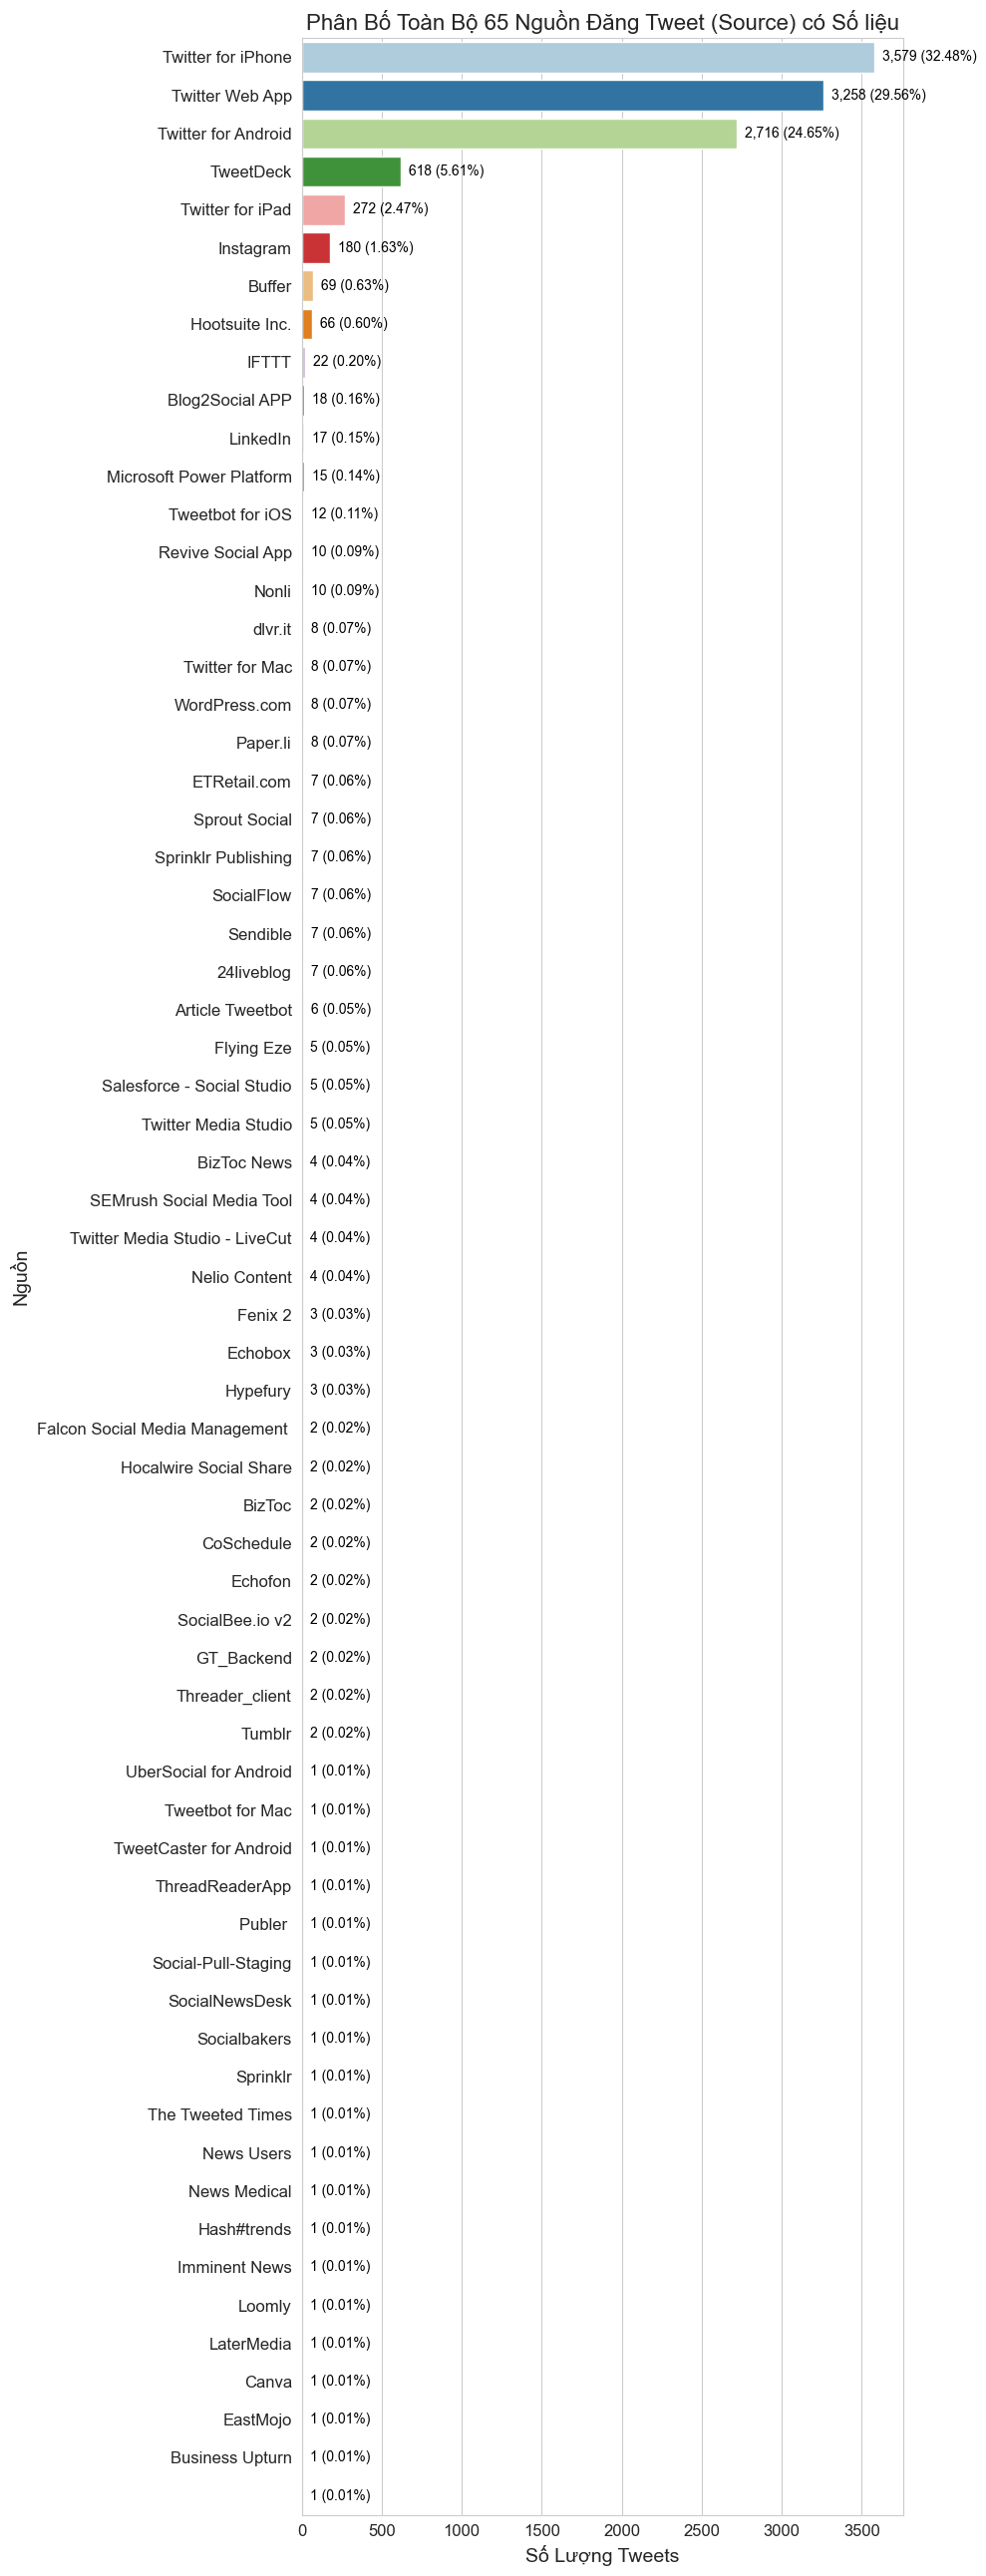

In [26]:
source_col = data['source']
unique_sources, counts = np.unique(source_col, return_counts=True)
total_rows = len(data) # Tổng số lượng bản ghi

# Sắp xếp tất cả các nguồn theo số lượng giảm dần
sorted_indices = np.argsort(counts)[::-1]
all_sorted_sources_bytes = unique_sources[sorted_indices]
all_sorted_counts = counts[sorted_indices]

# Chuyển byte string sang Unicode string để hiển thị trên biểu đồ
all_sorted_sources = [s.decode('utf-8') if isinstance(s, bytes) else s for s in all_sorted_sources_bytes]

# Vẽ biểu đồ 
num_sources = len(all_sorted_sources)
fig_height = max(6, num_sources * 0.4) 

plt.figure(figsize=(10, fig_height))
ax = sns.barplot(x=all_sorted_counts, y=all_sorted_sources, palette='Paired')

# 4. THÊM CHÚ THÍCH SỐ LƯỢNG VÀ TỈ LỆ (%)
for i, count in enumerate(all_sorted_counts):
    percentage = (count / total_rows) * 100
    text = f'{count:,.0f} ({percentage:.2f}%)' 
    
    # Thêm văn bản vào cuối thanh (x=count, y=i)
    ax.text(
        count + 50, 
        i,          
        text, 
        color='black', 
        ha='left', 
        va='center', 
        fontsize=10
    )

plt.title(f'Phân Bố Toàn Bộ {num_sources} Nguồn Đăng Tweet (Source) có Số liệu', fontsize=16)
plt.xlabel('Số Lượng Tweets', fontsize=14)
plt.ylabel('Nguồn', fontsize=14)
plt.tight_layout()
plt.show()

---


### **Số lượng tweet trong ngày thì sao?**

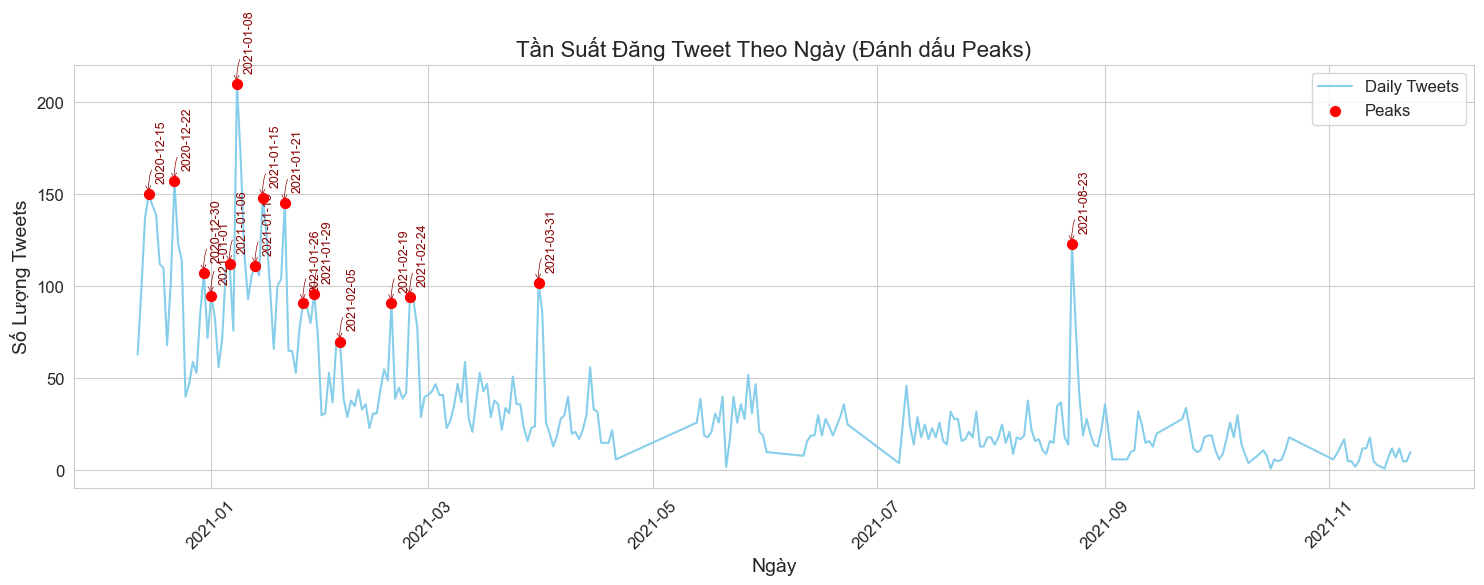

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime # Cần import này để dùng strftime()

date_col = new_data['date']
# Chuyển đổi datetime64 sang số ngày (để nhóm)
dates_as_days = date_col.astype('datetime64[D]')

# Đếm tần suất mỗi ngày 
unique_dates, counts = np.unique(dates_as_days, return_counts=True)

# Chuyển lại các ngày duy nhất thành datetime objects để vẽ biểu đồ
unique_dates_dt = unique_dates.astype(object)

# Tìm các đỉnh địa phương (Local Maxima)
is_peak = (counts[1:-1] > counts[:-2]) & (counts[1:-1] > counts[2:])
peak_indices = np.where(is_peak)[0] + 1
threshold = np.mean(counts) + 0.8 * np.std(counts)
significant_peak_indices = [i for i in peak_indices if counts[i] > threshold]


plt.figure(figsize=(15, 6))
plt.plot(unique_dates_dt, counts, color='skyblue', label='Daily Tweets')

# Vẽ các chấm đỏ tại các đỉnh tìm được
plt.scatter(unique_dates_dt[significant_peak_indices], 
            counts[significant_peak_indices], 
            color='red', s=50, zorder=5, label='Peaks')


# Thêm ngày tại các đỉnh 
for i in significant_peak_indices:

    peak_date_obj = unique_dates_dt[i] 
    
    date_label = peak_date_obj.strftime('%Y-%m-%d') 
    
    plt.annotate(
        date_label,
        (unique_dates_dt[i], counts[i]),  
        textcoords="offset points",       
        xytext=(5, 10),                   
        ha='left',                         
        fontsize=9,
        rotation=90,                      
        color='darkred',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color="darkred", linewidth=0.5)
    )


plt.title('Tần Suất Đăng Tweet Theo Ngày (Đánh dấu Peaks)', fontsize=16)
plt.xlabel('Ngày', fontsize=14)
plt.ylabel('Số Lượng Tweets', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### **Ta cùng phân tích** 

Ta để ý ngày có số lượng tweet cao nhất: là ngày **08/01/2021**, ta cùng tìm hiểu ngày đó có sự kiện gì?


> Hai hãng Pfizer và BioNTech công bố kết quả từ một nghiên cứu in vitro cho thấy kháng thể huyết thanh từ người được tiêm vaccine COVID-19 của họ có khả năng trung hoà virus SARS-CoV-2 mang đột biến N501Y — một đột biến được tìm thấy trong các biến thể lây lan nhanh ở Anh và Nam Phi.
> 
> Đột biến N501Y lúc đó rất đáng lo vì nó xuất hiện trong biến thể Anh (Alpha) và Nam Phi (Beta) — đều lây nhanh hơn.

Đây là một sự kiện quan trọng đánh dấu bước tiến triển trong phát triển vaccine chống đại dịch.

#### **Đồng thời ta cũng xem xét qua một vài ngày khác luôn nha**
- **22/12/2020:** EMA chính thức phê duyệt cho vaccine Pfizer/BioNTech được dùng ở châu Âu
- **31/3/2021:** Vaccine cho hiệu quả 100% trong nhóm tuổi 12-15 — trong số những người tham gia thử nghiệm, không có ca COVID-19 nào xảy ra trong nhóm được tiêm, trong khi có nhiều ca xảy ra ở nhóm đối chứng
- **23/08/2021:** FDA đã phê duyệt hoàn toàn vaccine được biết tới với tên thương mại Comirnaty, cho người từ 16 tuổi trở lên, thay vì chỉ sử dụng dưới giấy phép khẩn cấp (EUA). (Sự kiện quan trọng). Việc phê duyệt đầy đủ giúp tăng mức độ tin cậy của công chúng vào vaccine, và mở đường cho nhiều nơi (nhà tuyển dụng, chính quyền) đưa ra yêu cầu tiêm chủng mạnh hơn. 
- **24/02/2021:** COVAX Facility (một cơ chế toàn cầu do World Health Organization (WHO) phối hợp) đã gửi lô vaccine đầu tiên tới châu Phi — cụ thể là khoảng 600.000 liều vaccine của Serum Institute of India (cùng với AstraZeneca/University of Oxford) tới thủ đô Accra, Ghana.

### **Ta cùng xét thêm về Engagement theo thời gian để so sánh với số bài tweets ở trên**

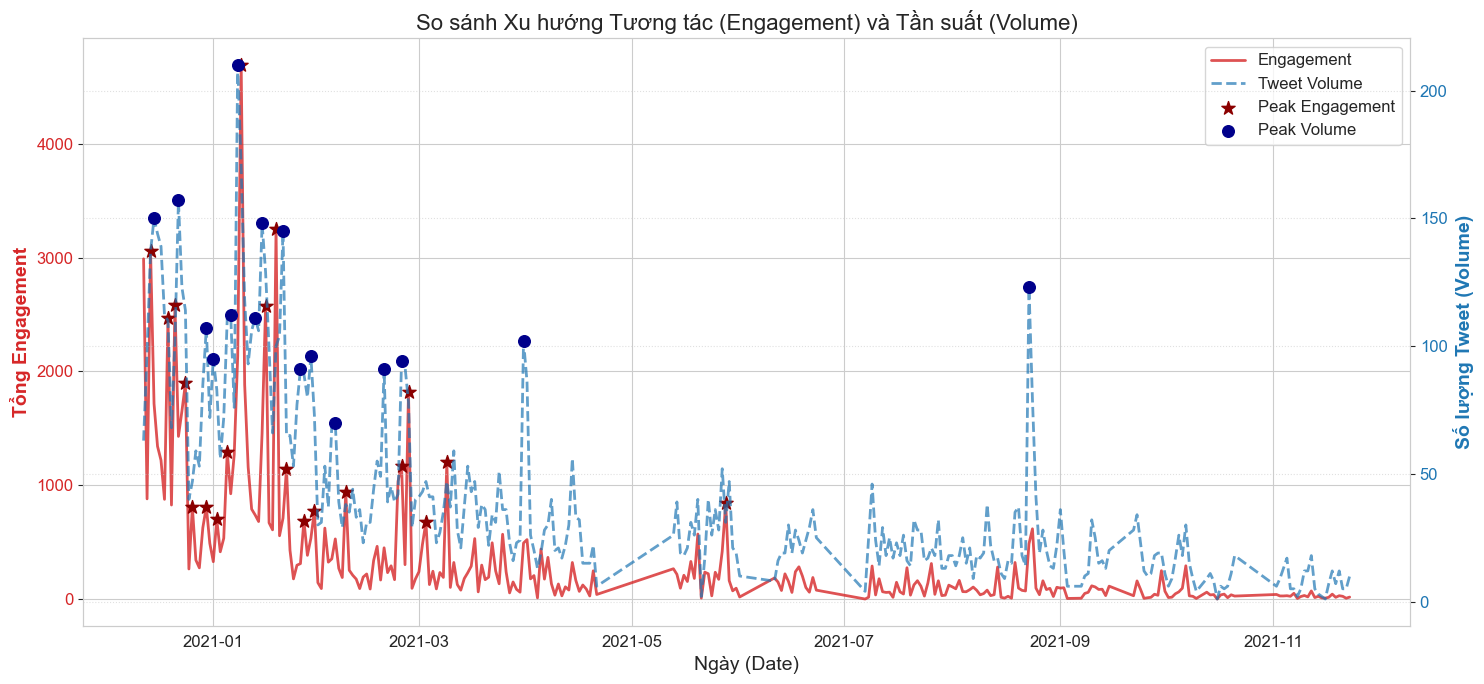

In [28]:

dates_full = new_data['date']
# Chuyển về ngày để gom nhóm
dates_days = dates_full.astype('datetime64[D]')
engagement_values = new_data['engagement'].astype(float)

# Gom nhóm theo ngày 
daily_stats = defaultdict(lambda: [0.0, 0]) 

for d, eng in zip(dates_days, engagement_values):
    d_str = str(d)
    daily_stats[d_str][0] += eng # Cộng dồn Engagement
    daily_stats[d_str][1] += 1  # Đếm số lượng Tweet

# Chuyển sang mảng 
sorted_dates = sorted(daily_stats.keys())
eng_sums = np.array([daily_stats[d][0] for d in sorted_dates])
tweet_counts = np.array([daily_stats[d][1] for d in sorted_dates])
dates_dt = np.array(sorted_dates, dtype='datetime64[D]')

# TÌM ĐỈNH ENGAGEMENT 
is_peak = (eng_sums[1:-1] > eng_sums[:-2]) & (eng_sums[1:-1] > eng_sums[2:])
peak_indices = np.where(is_peak)[0] + 1
threshold = np.mean(eng_sums) + 0.5 * np.std(eng_sums)
significant_peak_indices = [i for i in peak_indices if eng_sums[i] > threshold]


# TÌM ĐỈNH VOLUME 
is_volume_peak = (tweet_counts[1:-1] > tweet_counts[:-2]) & (tweet_counts[1:-1] > tweet_counts[2:])
volume_peak_indices = np.where(is_volume_peak)[0] + 1
volume_threshold = np.mean(tweet_counts) + 0.8 * np.std(tweet_counts) 
significant_volume_peak_indices = [i for i in volume_peak_indices if tweet_counts[i] > volume_threshold]


# Vẽ biểu đồ

fig, ax1 = plt.subplots(figsize=(15, 7))

# Trục Y1 (Trái): Tổng Engagement
color_eng = 'tab:red'
ax1.set_xlabel('Ngày (Date)', fontsize=14)
ax1.set_ylabel('Tổng Engagement', color=color_eng, fontsize=14, fontweight='bold')
line1, = ax1.plot(dates_dt, eng_sums, color=color_eng, linewidth=2, alpha=0.8, label='Engagement')
ax1.tick_params(axis='y', labelcolor=color_eng)

# Đánh dấu các đỉnh Engagement (Sao đỏ)
scat = ax1.scatter(dates_dt[significant_peak_indices], eng_sums[significant_peak_indices], 
                   color='darkred', s=100, zorder=5, marker='*', label='Peak Engagement')

# Trục Y2 (Phải): Số lượng Tweets
ax2 = ax1.twinx()
color_vol = 'tab:blue'
ax2.set_ylabel('Số lượng Tweet (Volume)', color=color_vol, fontsize=14, fontweight='bold')
line2, = ax2.plot(dates_dt, tweet_counts, color=color_vol, linewidth=2, linestyle='--', alpha=0.7, label='Tweet Volume')
ax2.tick_params(axis='y', labelcolor=color_vol)

# ĐÁNH DẤU ĐỈNH VOLUME 
scat_vol = ax2.scatter(dates_dt[significant_volume_peak_indices], tweet_counts[significant_volume_peak_indices], 
                       color='darkblue', s=70, zorder=4, marker='o', label='Peak Volume')


# Thêm Legend chung
lines = [line1, line2, scat, scat_vol]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('So sánh Xu hướng Tương tác (Engagement) và Tần suất (Volume)', fontsize=16)
plt.grid(True, linestyle=':', alpha=0.6)
fig.tight_layout()
plt.show()

In [29]:
# --- DANH SÁCH NGÀY CẦN XEM XÉT ---
target_dates = ['2021-08-23', '2021-03-31', '2021-02-19','2021-02-24','2021-01-21', '2021-01-29', '2021-01-26','2021-01-15' ]


def analyze_day(target_date, data):
    # Lọc dữ liệu của ngày đó
    dates_str = data['date'].astype('datetime64[D]').astype(str)
    mask = dates_str == target_date
    day_data = data[mask]
    
    if len(day_data) == 0:
        print(f"Không có dữ liệu cho ngày {target_date}")
        return

    # Tính toán các chỉ số
    n_tweets = len(day_data)

    # Tuổi tài khoản trung bình (ngày)
    # Chuyển timedelta sang float days
    acc_ages = day_data['acc_age'].astype('timedelta64[D]').astype(float)
    avg_age = np.mean(acc_ages)
    
    # Kiểm tra Nguồn & Hashtag 
    sources = [str(s) for s in day_data['source']]
    top_source = Counter(sources).most_common(1)[0]
    
    #  Nội dung (Từ khóa) 
    # Lấy bigram để hiểu ngữ cảnh
    text_list = [str(t) for t in day_data['text']]
    top_keywords = get_bigrams(text_list)

    # --- IN KẾT QUẢ ---
    print(f"=== PHÂN TÍCH NGÀY: {target_date} ===")
    print(f"1. Tổng số Tweet: {n_tweets}")
    
    print(f"2. Dấu hiệu Spam:")
    print(f"   - Tuổi đời tài khoản TB: {avg_age:.0f} ngày {'(THẤP - Nghi vấn Bot)' if avg_age < 100 else '(Lâu năm)'}")
    
    print(f"3. Dấu hiệu Media/Nguồn:")
    print(f"   - Nguồn phổ biến nhất: {top_source[0]} ({top_source[1]} tweets)")
    
    print(f"4. Nội dung chính (Top Keywords):")
    print(f"   - {', '.join([k[0] for k in top_keywords])}")
    
    print("-" * 50)

# --- CHẠY VÒNG LẶP ---
print(f"Đang phân tích {len(target_dates)} ngày nghi vấn...\n")
for d in target_dates:
    analyze_day(d, new_data)

Đang phân tích 8 ngày nghi vấn...

=== PHÂN TÍCH NGÀY: 2021-08-23 ===
1. Tổng số Tweet: 123
2. Dấu hiệu Spam:
   - Tuổi đời tài khoản TB: 2717 ngày (Lâu năm)
3. Dấu hiệu Media/Nguồn:
   - Nguồn phổ biến nhất: Twitter Web App (58 tweets)
4. Nội dung chính (Top Keywords):
   - approval pfizerbiontech, grants approval, fda grants, granted approval, pfizerbiontech covidvaccine, fda approval, fda granted, fda approves, food drug, approves pfizerbiontech, emergency use, opening door, pfizerbiontech shot, fda gives, gives approval
--------------------------------------------------
=== PHÂN TÍCH NGÀY: 2021-03-31 ===
1. Tổng số Tweet: 102
2. Dấu hiệu Spam:
   - Tuổi đời tài khoản TB: 2637 ngày (Lâu năm)
3. Dấu hiệu Media/Nguồn:
   - Nguồn phổ biến nhất: Twitter for iPhone (33 tweets)
4. Nội dung chính (Top Keywords):
   - says effective, effective adolescents, years old, effective children, clinical trial, pfizerbiontech says, pfizerbiontech effective, children aged, effective tolerated, pfizer

#### **Nhận xét**:
- Không có dấu hiệu là các bài spam do quan sát thấy số tuổi trung bình của mỗi tài khoản khác lớn
- Đối với các ngày các tweet chủ yếu là `Twitter Web App` thì có thể là các trang báo có uy tín đăng tải các thông tin, và điều đó nhằm chỉ để cung cấp thông tin, dẫn đến có thể lý giải tại sao lại ít tương tác tới vậy
- Quan sát `keywords` ta cũng có thể thấy những ngày mà `Twitter for iPhone` chiếm ưu thế thì có các từ tích cực như *'thank you', 'effective well',....* Ta có thể hiểu là ngày này có thể liên quan tới sự kiện các tổ chức đưa ra các chiến dịch để đưa vaccine tới thế giới hay đơn giản là cảm xúc của người dùng sau khi tiếp cận được với vaccine



---

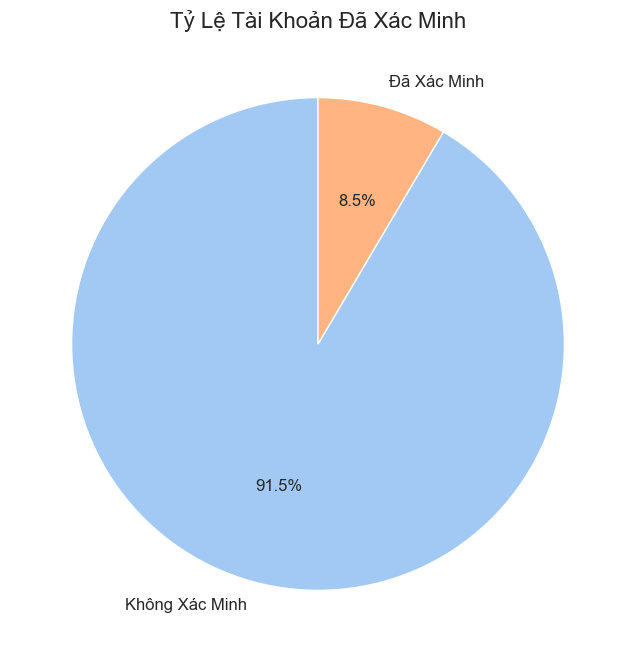

In [30]:
verified_counts = np.unique(data['user_verified'], return_counts=True)

if len(verified_counts[0]) == 2: 
    verified_ratio = verified_counts[1]
    labels = ['Không Xác Minh', 'Đã Xác Minh']
    
    plt.figure(figsize=(8, 8))
    plt.pie(verified_ratio, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Tỷ Lệ Tài Khoản Đã Xác Minh', fontsize=16)
    plt.show()

### **Tài khoản Verified (người nổi tiếng/tổ chức) có sức ảnh hưởng lớn hơn hẳn người thường không?**

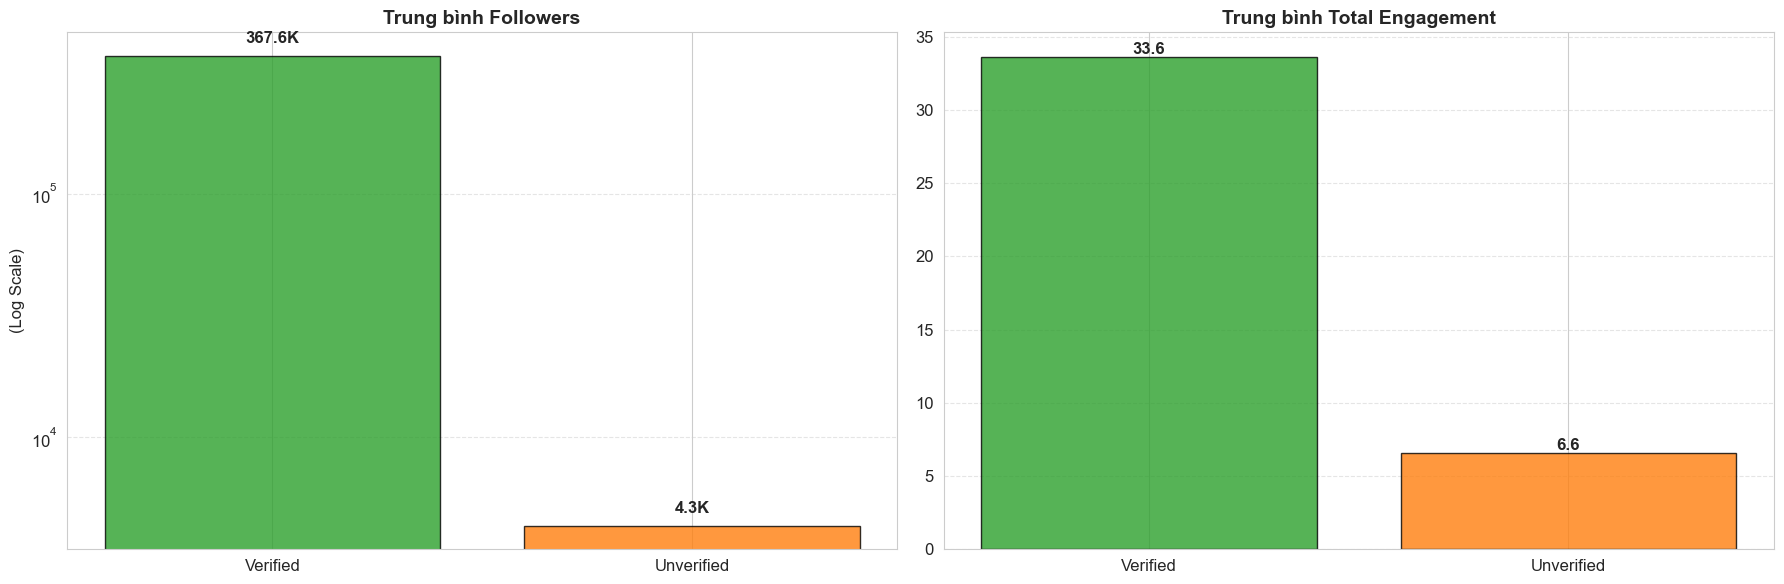

In [31]:
verified_mask = new_data['user_verified'].astype(bool)
unverified_mask = ~verified_mask

# Tính toán
def get_avg(data, col_name):
    if len(data) == 0: return 0
    return np.nanmean(data[col_name].astype(float))

metrics = {
    'Followers': 'user_followers',
    'Total Engagement': 'engagement'
}

results = {
    'Verified': [],
    'Unverified': []
}

for metric, col in metrics.items():
    results['Verified'].append(get_avg(new_data[verified_mask], col))
    results['Unverified'].append(get_avg(new_data[unverified_mask], col))

# Trực quan hóa 
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
colors = ['#2ca02c', '#ff7f0e'] 
labels = ['Verified', 'Unverified']

for i, (metric_name, col_key) in enumerate(metrics.items()):
    ax = axes[i]
    values = [results['Verified'][i], results['Unverified'][i]]
    
    bars = ax.bar(labels, values, color=colors, alpha=0.8, edgecolor='black')
    
    ax.set_title(f'Trung bình {metric_name}', fontsize=14, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Xử lý scale cho Followers nếu chênh lệch quá lớn
    if col_key == 'user_followers':
        ax.set_yscale('log')
        ax.set_ylabel('(Log Scale)')
        
    # Hiển thị giá trị trên cột
    for bar, val in zip(bars, values):
        height = bar.get_height()
        if val > 1000:
            text = f'{val/1000:.1f}K'
        elif val < 1:
            text = f'{val:.4f}'
        else:
            text = f'{val:.1f}'
            
        # Đặt text ở vị trí thích hợp 
        y_pos = height if col_key != 'user_followers' else height * 1.1 
        ax.text(bar.get_x() + bar.get_width()/2, y_pos, text, 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Nhận xét**
Điều này càng khẳng định một điều rằng, người/tổ chức có tầm ảnh hưởng sẽ có số tương tác tweet cao hơn rất nhiều so với người thường (hiển nhiên), điều này cũng cho thấy những người/tổ chức này có vai trò lớn trong việc quảng bá, thông tin đến với xã hội (có thể là các nhà đài) 

---

### **Ta được biết mỗi bài tweet có tối đa 280 ký tự, ta cũng xem xét trường `text` coi có gì lạ không**

Độ dài Tweet Trung bình: 129.44 ký tự
Độ dài Tweet Trung vị: 140 ký tự
Tweet dài nhất: 156 ký tự


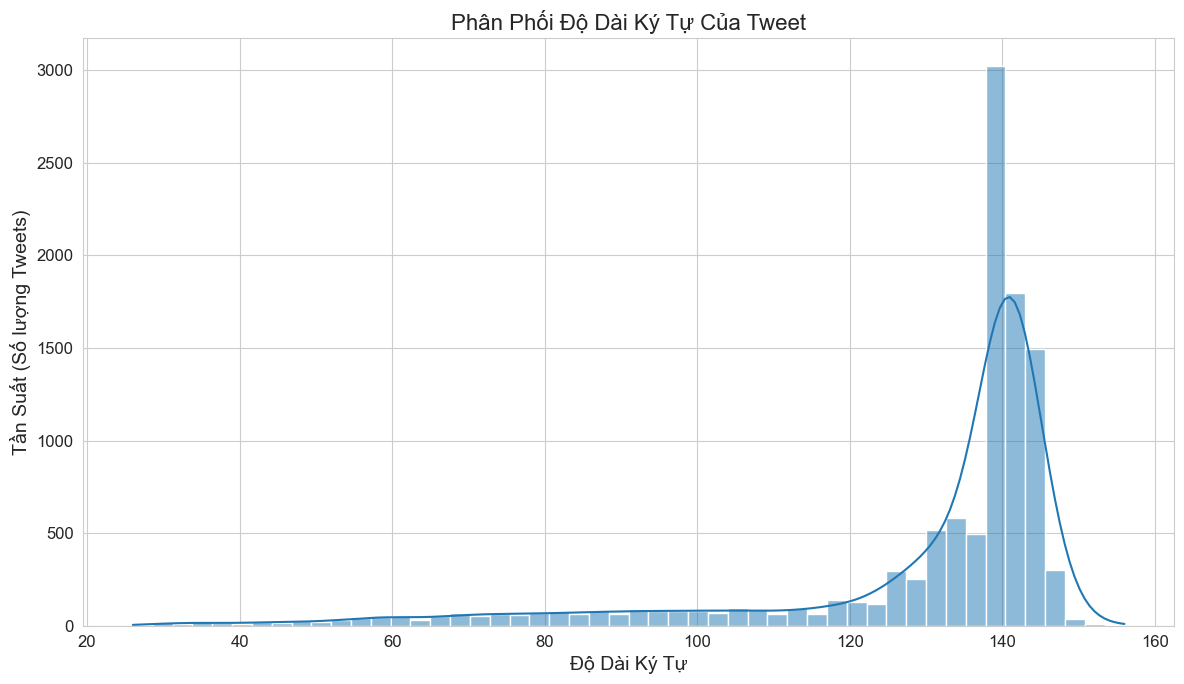

In [32]:

text_col = new_data['text']

tweet_lengths = np.char.str_len(text_col)



# Cột mới tweet_lengths
new_data = rfn.append_fields(
    base=new_data, 
    names='tweet_lengths', 
    data=tweet_lengths, 
    usemask=False
)

print(f"Độ dài Tweet Trung bình: {np.mean(tweet_lengths):.2f} ký tự")
print(f"Độ dài Tweet Trung vị: {np.median(tweet_lengths):.0f} ký tự")
print(f"Tweet dài nhất: {np.max(tweet_lengths)} ký tự")

plt.figure(figsize=(12, 7))
sns.histplot(tweet_lengths, bins=50, kde=True)
plt.title('Phân Phối Độ Dài Ký Tự Của Tweet', fontsize=16)
plt.xlabel('Độ Dài Ký Tự', fontsize=14)
plt.ylabel('Tần Suất (Số lượng Tweets)', fontsize=14)
plt.tight_layout()


#### **Nhận xét**
Ta thấy phần lớn các bài tweets có nội dung tương đối -> có đầu tư về mặt nội dung

#### **Vậy độ dài bài tweet có phụ thuộc vào loại người dùng (verify hay non-verify)?**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\1169831536.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True,


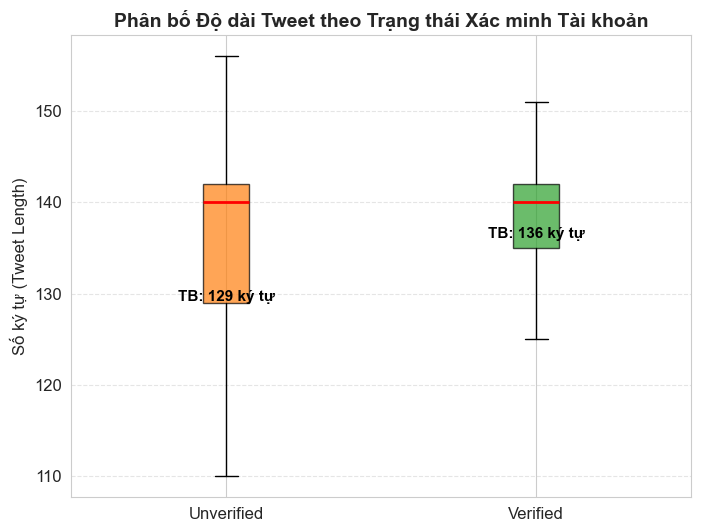

In [36]:
lengths = new_data['tweet_lengths'].astype(float)
verified_status = new_data['user_verified'].astype(bool)

len_verified = lengths[verified_status]
len_unverified = lengths[~verified_status]


avg_len_ver = np.mean(len_verified)
avg_len_unver = np.mean(len_unverified)
med_len_ver = np.median(len_verified)
med_len_unver = np.median(len_unverified)



# TRỰC QUAN HÓA 
plt.figure(figsize=(8, 6))

data_to_plot = [len_unverified, len_verified]
labels = ['Unverified', 'Verified']
colors = ['#ff7f0e', '#2ca02c']


bplot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True, 
                    boxprops=dict(facecolor='white', color='black'),
                    medianprops=dict(color='red', linewidth=2),
                    showfliers=False) # Ẩn bớt điểm ngoại lai cho đỡ rối


for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Ghi chú giá trị trung bình 
for i, avg in enumerate([avg_len_unver, avg_len_ver]):
    plt.text(i + 1, avg, f'TB: {avg:.0f} ký tự', 
             ha='center', va='bottom', color='black', fontweight='bold', fontsize=11)
    
plt.title('Phân bố Độ dài Tweet theo Trạng thái Xác minh Tài khoản', fontsize=14, fontweight='bold')
plt.ylabel('Số ký tự (Tweet Length)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### **Nhận xét**
- Tài khoản Verified có trung bình tweet dài hơn một chút (~7 ký tự), nhưng sự khác biệt không quá lớn.
- Tweet từ tài khoản `non-verify` có độ dài dao động rộng hơn, trong khi tài khoản `verified` có xu hướng tweet dài ổn định hơn.

-> Không có sự phân biệt quá lớn giữa hai nhóm người dùng này về độ dài tweets

---

### **Còn cột `Hashtag` thì sao?**

In [ ]:

hashtag_counter = Counter()
hashtag_col = new_data['hashtags']
total_rows = len(new_data)

for h_list_str in hashtag_col:
    # Làm sạch chuỗi: loại bỏ '[', ']', '"', "'" và khoảng trắng
    cleaned_str = str(h_list_str).strip("[]'\" ")
    
    if cleaned_str:
        # Tách chuỗi bằng dấu phẩy (và có thể có dấu cách hoặc chấm phẩy)
        tags = re.split(r"[',;]\s*", cleaned_str)
        
        # Cập nhật bộ đếm (lọc bỏ các chuỗi rỗng có thể xuất hiện sau khi split)
        hashtag_counter.update(tag.strip() for tag in tags if tag.strip())

# Lấy 15 hashtag phổ biến nhất
top_15_hashtags = hashtag_counter.most_common(15)

print(f"{'Hashtag':<30}{'Số Lượng (Count)':>18}{'Tỉ Lệ (%)':>15}")
print("-" * 63)

for label, count in top_15_hashtags:
    percentage = (count / total_rows) * 100
    # Sử dụng định dạng hàng nghìn (,) cho số lượng và thêm dấu #
    print(f"#{label:<29}{count:>18,}{percentage:>14.2f}%")
print("-" * 63)
print(f"Tổng số Tweet: {total_rows:,}")
print(f"Tổng số Hashtag duy nhất: {len(hashtag_counter):,}")

Hashtag                         Số Lượng (Count)      Tỉ Lệ (%)
---------------------------------------------------------------
#PfizerBioNTech                            4,161         37.76%
#PfizerBiontech                            1,432         12.99%
#COVID19                                   1,185         10.75%
#vaccine                                     879          7.98%
#Pfizer                                      654          5.93%
#CovidVaccine                                619          5.62%
#Moderna                                     384          3.48%
#PfizerVaccine                               315          2.86%
#AstraZeneca                                 270          2.45%
#pfizerbiontech                              256          2.32%
#coronavirus                                 228          2.07%
#COVID19Vaccine                              211          1.91%
#vaccines                                    211          1.91%
#Covid19                                

#### **Có nhiều dữ liệu trùng ý nghĩa nhau -> cần xử lý thêm**

In [ ]:
NO_HASHTAG = 'no_hashtag'
hashtag_col = new_data['hashtags']
processed_hashtags = []
draw_hashtags = []

all_tags_list = []

for tag_string in hashtag_col:

    if not tag_string.strip() or tag_string == NO_HASHTAG :
        processed_hashtags.append(NO_HASHTAG)
        continue

    cleaned_string = process_hashtag(tag_string)
    processed_hashtags.append(cleaned_string)


    if isinstance(cleaned_string, str):
        tags_list = cleaned_string.split() # Tách theo khoảng trắng
    elif isinstance(cleaned_string, list):
        tags_list = cleaned_string # Nếu lỡ nó là list rồi thì giữ nguyên
    else:
        tags_list = [] # Phòng trường hợp None hoặc lỗi
        
    # 4. Lưu vào các danh sách
    draw_hashtags.extend(tags_list)    

new_data['hashtags'] = np.array(processed_hashtags, dtype=object)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11748\1075093428.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts, y=labels, palette='viridis')


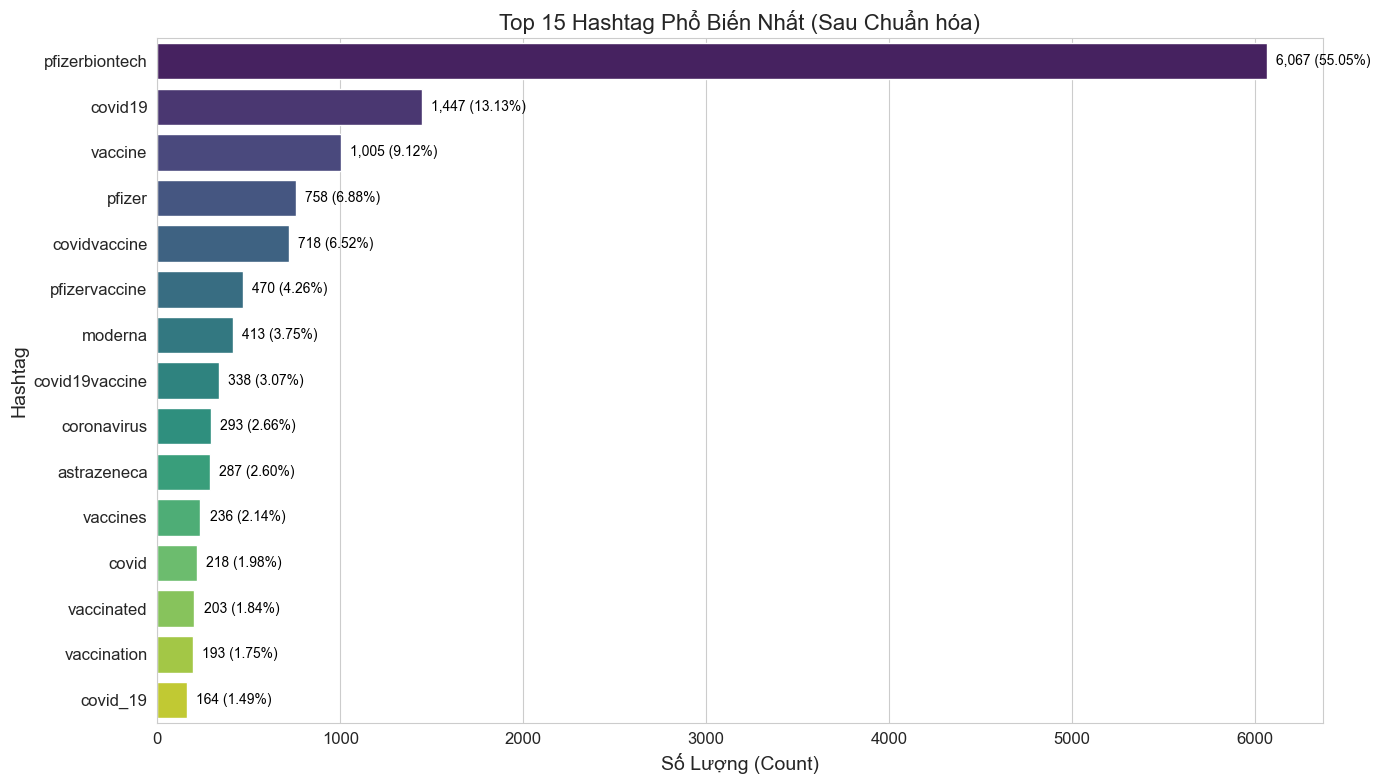

In [ ]:
hashtag_col = new_data['hashtags']
total_rows = len(new_data)


# Đếm tần suất
word_counter = Counter(draw_hashtags)
top_15_hashtags = word_counter.most_common(15)

# Tách nhãn và số lượng
labels = [tag[0] for tag in top_15_hashtags]
counts = [tag[1] for tag in top_15_hashtags]


plt.figure(figsize=(14, 8))
ax = sns.barplot(x=counts, y=labels, palette='viridis')

# Thêm chú thích số liệu
for i, count in enumerate(counts):
    percentage = (count / total_rows) * 100
    text = f'{count:,.0f} ({percentage:.2f}%)' 
    ax.text(count + 50, i, text, color='black', ha='left', va='center', fontsize=10)

plt.title('Top 15 Hashtag Phổ Biến Nhất (Sau Chuẩn hóa)', fontsize=16)
plt.xlabel('Số Lượng (Count)', fontsize=14)
plt.ylabel('Hashtag', fontsize=14)
plt.tight_layout()
plt.show()

### **Tạo trường mới hashtags_count va mentions_count**
- `hashtags_count`: Dùng để đánh giá xem số hashtags có liên hệ gì với bài tweet đó có thể sẽ trending hay không 
- `mentions_count`: Mức độ hội thoại của các người dùng, có thể mở ra một cuộc thảo luận cho một bài viết hay không

In [ ]:
# Sử dụng np.vectorize để áp dụng hàm Python lên mảng NumPy hiệu quả
v_count_hashtags = np.vectorize(count_hashtags)
v_count_mentions = np.vectorize(count_mentions)

# Tính toán các giá trị
hashtags_count = v_count_hashtags(new_data['hashtags'])
mentions_count = v_count_mentions(new_data['text'])




if "hashtags_count" not in new_data.dtype.names:
    new_data = rfn.append_fields(
        base=new_data, 
        names='hashtags_count', 
        data=hashtags_count, 
        dtypes='<i8',
        usemask=False
    )
    print("Thêm cột 'hashtags_count' thành công!")
else:
    print("Cột 'hashtags_count' đã tồn tại.")



if "mentions_count" not in new_data.dtype.names:
    new_data = rfn.append_fields(
        base=new_data, 
        names='mentions_count', 
        data=mentions_count, 
        dtypes='<i8',
        usemask=False
    )
    print("Thêm cột 'mentions_count' thành công!")
else:
    print("Cột 'mentions_count' đã tồn tại.")


print(f"Max Hashtags Count: {np.max(new_data['hashtags_count'])}")
print(f"Max Mentions Count: {np.max(new_data['mentions_count'])}")

Thêm cột 'hashtags_count' thành công!
Thêm cột 'mentions_count' thành công!
Max Hashtags Count: 11
Max Mentions Count: 12


---

### **Còn về cột `user_location`?**

In [ ]:

location_col = data['user_location']

# Kiểm tra cả chuỗi byte rỗng (b'') và chuỗi unicode rỗng ('')
valid_locations = location_col[(location_col != b'') & (location_col != '')]

# Đếm
unique_values, counts = np.unique(valid_locations, return_counts=True)

# sắp xếp
sorted_indices = np.argsort(counts)[::-1]

# Sắp xếp lại giá trị duy nhất và số đếm
sorted_unique_values = unique_values[sorted_indices]
sorted_counts = counts[sorted_indices]


for value, count in zip(sorted_unique_values[:10], sorted_counts[:10]):
    display_value = value.decode('utf-8') if isinstance(value, bytes) else str(value)
    print(f"{display_value:<30} {count}")

print(f"\n... (Tổng số vị trí duy nhất không rỗng: {len(unique_values)})")

Malaysia                       168
"London; England"              142
India                          127
Petaling Jaya                  106
London                         95
Canada                         90
Hong Kong                      80
United Kingdom                 77
"Weinheim; Germany"            76
United Arab Emirates           73

... (Tổng số vị trí duy nhất không rỗng: 3136)


#### Có các dữ liệu có vẻ chung ý nghĩa với nhau -> cần xử lý thêm

In [ ]:

IMPUTE_VALUE = 'unknown_location'
location_col_raw = new_data['user_location']

# 1. Normalization Sơ bộ (Lowercasing, Imputation, Clean Symbols)
location_col_normalized = np.array([
    IMPUTE_VALUE if not str(loc).strip() else str(loc).lower()
    for loc in location_col_raw
], dtype=object)

location_col_normalized = np.char.replace(location_col_normalized.astype(str), ';', ',')
location_col_normalized = np.char.replace(location_col_normalized, '"', '')
location_col_normalized = np.char.replace(location_col_normalized, "'", '')
location_col_normalized = np.array([
    re.sub(r'[^\w\s,]', '', loc).strip() for loc in location_col_normalized
], dtype=object)


# 2. Áp dụng Substring Mapping lên toàn bộ mảng
final_locations = np.array([
    IMPUTE_VALUE if not str(loc).strip() else improved_location_mapper(loc, COMPREHENSIVE_MAPPING)
    for loc in location_col_normalized
], dtype=object)


new_data['user_location'] = final_locations




In [ ]:
# Thống kê tần suất
unique_final, counts_final = np.unique(final_locations, return_counts=True)
sorted_indices = np.argsort(counts_final)[::-1]
top_labels = unique_final[sorted_indices[:15]]
top_counts = counts_final[sorted_indices[:15]]
total_rows = len(final_locations)

print("--- Thống kê Top 15 Vị Trí ---")
print(f"{'Vị Trí':<30}{'Số Lượng (Count)':>18}{'Tỉ Lệ (%)':>15}")
print("-" * 63)

for label, count in zip(top_labels, top_counts):
    percentage = (count / total_rows) * 100
    print(f"{label:<30}{count:>18,}{percentage:>14.2f}%")


--- Thống kê Top 15 Vị Trí ---
Vị Trí                          Số Lượng (Count)      Tỉ Lệ (%)
---------------------------------------------------------------
usa                                        5,960         54.08%
united kingdom                             1,028          9.33%
india                                        432          3.92%
malaysia                                     308          2.79%
united arab emirates                         221          2.01%
ireland                                      180          1.63%
global                                       162          1.47%
hong kong                                     88          0.80%
europe                                        60          0.54%
ragbag of reviews and insights                49          0.44%
keepfightingmichael                           45          0.41%
qatar                                         39          0.35%
türkiye                                       29          0.26%
australia

---

### **Tổng thể các biến ta vừa tạo từ đầu tới giờ có tương quan với nhau hay không**

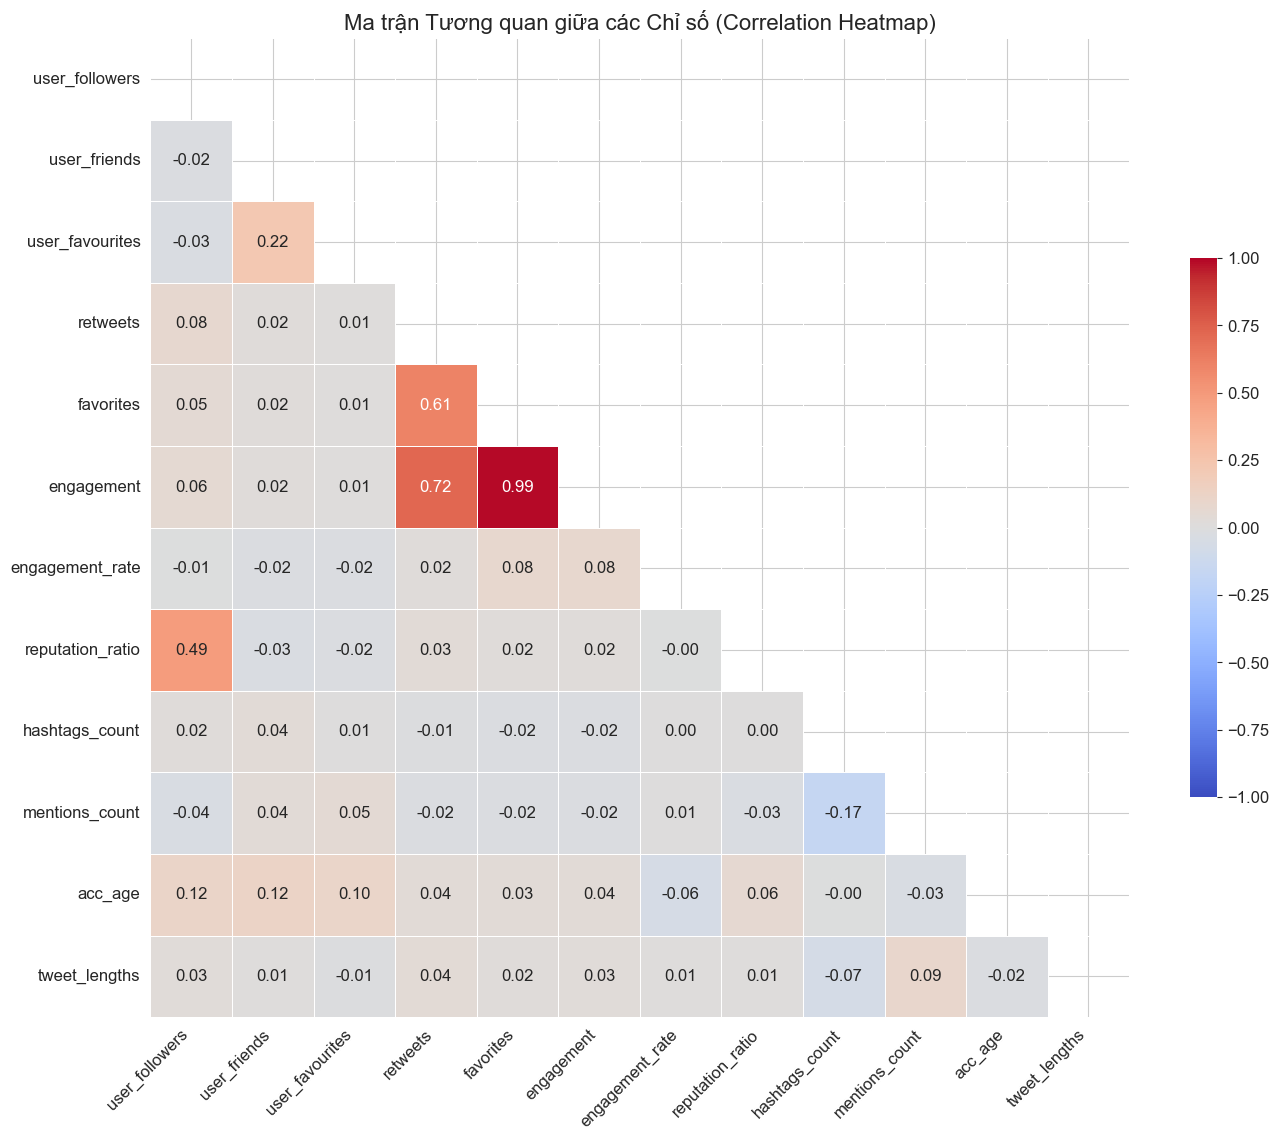

In [ ]:
# --- 1. Chuẩn bị các trường số liệu ---

# Danh sách các cột muốn phân tích tương quan
cols_to_analyze = [
    'user_followers', 
    'user_friends', 
    'user_favourites', 
    'retweets', 
    'favorites', 
    'engagement', 
    'engagement_rate', 
    'reputation_ratio', 
    'hashtags_count', 
    'mentions_count',
    'acc_age',        
    'tweet_lengths'
]

# Dictionary để lưu dữ liệu các cột
data_dict = {}

for col in cols_to_analyze:
    # Kiểm tra xem cột có tồn tại trong dữ liệu không
    if col in new_data.dtype.names:
        arr = new_data[col]
        
        # Xử lý đặc biệt cho acc_age nếu nó là timedelta
        if col == 'acc_age' and np.issubdtype(arr.dtype, np.timedelta64):
            arr = arr.astype('timedelta64[D]').astype(float)
        
        data_dict[col] = arr.astype(float)
    else:
        print(f"Cảnh báo: Cột '{col}' chưa có trong dữ liệu. Bỏ qua.")

# Nếu 'tweet_lengths' chưa có, tính nhanh từ cột 'text'
if 'tweet_lengths' not in data_dict and 'text' in new_data.dtype.names:
    print("Đang tính toán 'tweet_lengths'...")
    # Xử lý decode nếu là bytes
    texts = new_data['text']
    lengths = []
    for t in texts:
        if isinstance(t, bytes):
            t = t.decode('utf-8')
        lengths.append(len(str(t)))
    data_dict['tweet_lengths'] = np.array(lengths, dtype=float)

# --- 2. Tạo Ma trận Tương quan ---

# Lấy danh sách keys cuối cùng có dữ liệu
final_cols = list(data_dict.keys())
# Stack các mảng thành ma trận (cột = feature, hàng = sample)
data_matrix = np.column_stack([data_dict[c] for c in final_cols])

# Tính ma trận tương quan Pearson
# Lưu ý: Dữ liệu MXH thường lệch, Pearson có thể bị ảnh hưởng bởi outliers.
# Tuy nhiên, nó vẫn là chuẩn mực đầu tiên.
corr_matrix = np.corrcoef(data_matrix, rowvar=False)

# --- 3. Vẽ Heatmap ---

plt.figure(figsize=(14, 12))

# Tạo mask để che nửa trên của ma trận (vì đối xứng) giúp dễ nhìn hơn
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    annot=True,           # Hiển thị số
    fmt=".2f",            # Làm tròn 2 chữ số thập phân
    cmap='coolwarm',      # Màu: Đỏ (Dương) - Xanh (Âm)
    vmin=-1, vmax=1,      # Giới hạn thang màu
    center=0,             # Trung tâm là 0 (Trắng)
    mask=mask,            # Che nửa trên
    xticklabels=final_cols,
    yticklabels=final_cols,
    square=True,          # Ô vuông
    linewidths=.5,        # Viền trắng giữa các ô
    cbar_kws={"shrink": .5} # Thu nhỏ thanh màu
)

plt.title('Ma trận Tương quan giữa các Chỉ số (Correlation Heatmap)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Lưu các dư liệu để chuyển qua quá trình tiền xử lý dữ liệu** 

In [ ]:


# Sử dụng np.save để lưu mảng NumPy có cấu trúc
# lưu lại thuộc tính của newdata 
np.save(FILE_PATH_SENTIMENT, new_data)

print(f"Đã lưu mảng 'new_data' vào file binary: {FILE_PATH_SENTIMENT}")

Đã lưu mảng 'new_data' vào file binary: ..\data\processed\processed_missing_sentiment.npy
